In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow и tf.keras
import tensorflow as tf
from tensorflow import keras

# Вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt

import os
import skimage
import random

print(tf.__version__)

2.0.0-beta1


In [2]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".png")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(d)
    return images, labels

ROOT_PATH = "/home/nikita/Desktop/English"
train_data_directory = os.path.join(ROOT_PATH, "Fnt128")

images, labels = load_data(train_data_directory)
for i in range(len(images)):
    images[i] = images[i]/255
c = list(zip(images, labels))

random.shuffle(c)

images, labels = zip(*c)

labels= [int(i) for i in labels]

In [3]:
images_train = np.array(images[0:int(0.8*len(images))])
labels_train = np.array(labels[0:int(0.8*len(labels))])

In [4]:
images_test = np.array(images[int(0.8*len(images)):])
labels_test = np.array(labels[int(0.8*len(labels)):])

In [5]:
class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

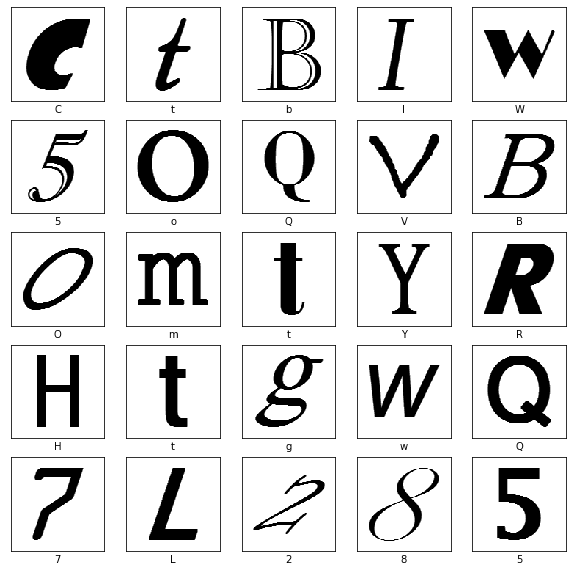

(50393, 128, 128)
50393


In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[labels_train[i]])
plt.show()
print(images_train.shape)
print(len(labels_train))

In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(input_shape=(128, 128, 1), kernel_size = (5, 5), filters = 32, activation='relu'),
    keras.layers.MaxPool2D(pool_size = (2, 2)),
    keras.layers.Conv2D(kernel_size = (5, 5), filters = 64, activation='relu'),
    keras.layers.MaxPool2D(pool_size = (2, 2)),
    keras.layers.Conv2D(kernel_size = (5, 5), filters = 128, activation='relu'),
    keras.layers.MaxPool2D(pool_size = (2, 2)),
    keras.layers.Conv2D(kernel_size = (5, 5), filters = 256, activation='relu'),
    keras.layers.MaxPool2D(pool_size = (2, 2)),
    #keras.layers.Conv2D(kernel_size = (3, 3), filters = 512, activation='relu'),
    #keras.layers.MaxPool2D(pool_size = (2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(62, activation='softmax')
])

In [8]:
#model = keras.Sequential()
#model.add(keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size = 5, filters = 32, activation='relu'))
#print(model.output_shape)
#model.add(keras.layers.MaxPool2D(pool_size = (2, 2)))
#print(model.output_shape)
#model.add(keras.layers.Conv2D(kernel_size = (5, 5), filters = 64, activation='relu'))
#print(model.output_shape)
#model.add(keras.layers.MaxPool2D(pool_size = (2, 2)))
#print(model.output_shape)
#model.add(keras.layers.Flatten())
#print(model.output_shape)
#model.add(keras.layers.Dense(1984, activation='relu'))
#print(model.output_shape)
#model.add(keras.layers.Dense(496, activation='relu'))
#print(model.output_shape)
#model.add(keras.layers.Dense(62, activation='softmax'))

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
images_train = images_train.reshape(-1,128, 128, 1)
images_test = images_test.reshape(-1,128, 128, 1)
model.fit(images_train, labels_train, epochs=10)

W0710 11:41:43.523582 140324531930944 deprecation.py:323] From /home/nikita/.local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50393 samples
Epoch 1/10
50393/50393 [==============================] - 1035s 21ms/sample - loss: 0.8107 - accuracy: 0.7467
Epoch 2/10
50393/50393 [==============================] - 1018s 20ms/sample - loss: 0.3622 - accuracy: 0.8590
Epoch 3/10
50393/50393 [==============================] - 1025s 20ms/sample - loss: 0.2923 - accuracy: 0.8832
Epoch 4/10
50393/50393 [==============================] - 1068s 21ms/sample - loss: 0.2544 - accuracy: 0.8963
Epoch 5/10
50393/50393 [==============================] - 1217s 24ms/sample - loss: 0.2360 - accuracy: 0.9048
Epoch 6/10
50393/50393 [==============================] - 1175s 23ms/sample - loss: 0.2123 - accuracy: 0.9136
Epoch 7/10
50393/50393 [==============================] - 1165s 23ms/sample - loss: 0.1966 - accuracy: 0.9199
Epoch 8/10
50393/50393 [==============================] - 1213s 24ms/sample - loss: 0.1916 - accuracy: 0.9232
Epoch 9/10
50393/50393 [==============================] - 1162s 23ms/sample - loss: 0.1797 - accu

In [11]:
test_loss, test_acc = model.evaluate(images_test, labels_test)

print('\nТочность на проверочных данных:', test_acc)

12599/12599 [==============================] - 71s 6ms/sample - loss: 0.2381 - accuracy: 0.9052

Точность на проверочных данных: 0.9052306


In [12]:
model.save_weights('./checkpoints/my_checkpoint')
model.save('my_model.h5')

In [13]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i].reshape(128,128)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(62), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [14]:
predictions = model.predict(images_test)

In [15]:
#images_test_out = [i.reshape(28,28) for i in images_test]

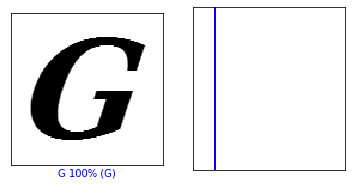

In [16]:
i = random.randint(0, len(images_test))
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, labels_test, images_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  labels_test)
plt.show()

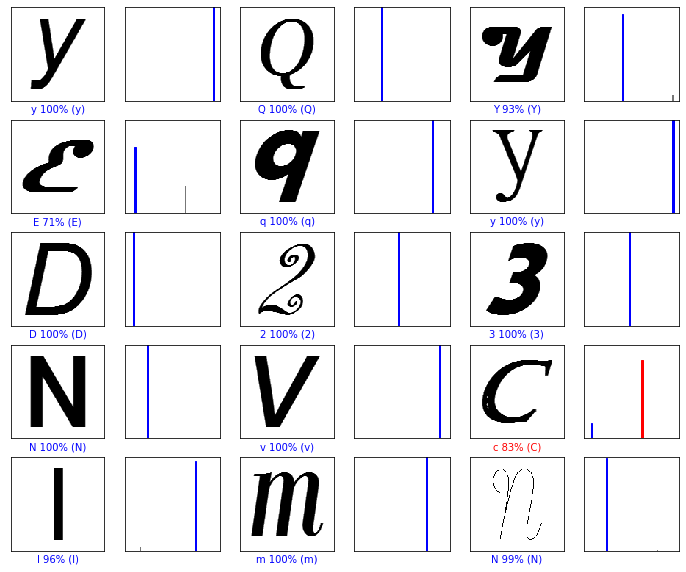

In [21]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
j = random.randint(0, len(images_test - num_images))
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+j, predictions, labels_test, images_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+j, predictions, labels_test)
plt.show()